# 01. Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import os

# 02. Importing data 

In [2]:
# Create path
path = r'/Users/chadstacey/04-01-2021_InstaCart_Basket_Analysis'

In [3]:
# Import latest version of ords/prods/cust dataset
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_customers_merged.pkl'))

In [4]:
ords_prods_cust.shape

(32404859, 32)

In [5]:
crosstab = pd.crosstab(ords_prods_cust['days_since_prior_order'], ords_prods_cust['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

# Question 2) Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
# Drop first and last name as they are PII data
ords_prods_cust.drop('First Name', inplace=True, axis=1)
ords_prods_cust.drop('Surname', inplace=True, axis=1)

In [8]:
# Drop more unnecessary columns
ords_prods_cust.drop('busiest_days', inplace=True, axis=1)

In [9]:
for col in ords_prods_cust.columns: 
    print(col)

order_id
user_id
order_number
orders_day_of_week
order_hour_of_day
days_since_prior_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
price_range_loc
busiest_day
busiest_period_of_day
max_order
loyalty_flag
mean_purchase_price
spending_flag
median_days_since_prior_order
order_frequency_flag
Gender
STATE
Age
date_joined
dependants
fam_status
income


In [10]:
# Check output 
ords_prods_cust[['max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag']].head(500)

,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,10,New customer,Low spender,Non-frequent customer
1,10,New customer,Low spender,Non-frequent customer
2,10,New customer,Low spender,Non-frequent customer
3,10,New customer,Low spender,Non-frequent customer
4,10,New customer,Low spender,Non-frequent customer
...,...,...,...,...
495,33,Regular customer,Low spender,Frequent customer
496,33,Regular customer,Low spender,Frequent customer
497,33,Regular customer,Low spender,Frequent customer
498,33,Regular customer,Low spender,Frequent customer


# Question 3a) The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
# Execute for-loop specifying REGIONS
result = []

for value in ords_prods_cust['STATE']:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    result.append('Northeast')
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Missouri' or value == 'Minnesota' or value == 'Iowa':
    result.append('Midwest')
  elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
    result.append('West')  
  else:
    result.append('South')

In [12]:
# Print result
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [13]:
# Create new column for REGIONS
ords_prods_cust['REGION'] = result

In [14]:
# Check output 
ords_prods_cust[['STATE', 'REGION']].head(500)

,STATE,REGION
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South
...,...,...
495,Montana,West
496,Montana,West
497,Montana,West
498,Montana,West


# Question 3b) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [15]:
# Create crosstab to compare spending habits 
crosstab1 = pd.crosstab(ords_prods_cust['spending_flag'], ords_prods_cust['REGION'], dropna = False)

In [16]:
# Check output 
crosstab1

REGION,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155946,108218,209637,160316
Low spender,7441379,5614518,10582248,8132597


As you can see there is no significant difference in spending habits between different US regions. Generally around 98% of customers in all four regions are defined as low spenders. 

# Question 4) The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Derive columns with loc()
ords_prods_cust.loc[ords_prods_cust['order_number'] >= 5, 'activity flag'] = 'High activity'
ords_prods_cust.loc[ords_prods_cust['order_number'] < 5, 'activity flag'] = 'Low activity'

In [18]:
# Check output
ords_prods_cust[['order_number', 'user_id', 'activity flag']].head(60)

,order_number,user_id,activity flag
0,1,1,Low activity
1,2,1,Low activity
2,3,1,Low activity
3,4,1,Low activity
4,5,1,High activity
5,6,1,High activity
6,7,1,High activity
7,8,1,High activity
8,9,1,High activity
9,10,1,High activity


In [19]:
# Remove customers with low activity 
ords_prods_cust.drop(ords_prods_cust.index[ords_prods_cust['activity flag'] == 'Low activity'], inplace = True)

In [20]:
# Check output
ords_prods_cust.head(60)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,STATE,Age,date_joined,dependants,fam_status,income,REGION,activity flag
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
15,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
16,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
17,550135,1,7,1,9,20.0,12427,3,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
18,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


# Question 5) The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [21]:
# Derive columns with loc()
ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['fam_status'] != 'married') & (ords_prods_cust['dependants'] == 0), 'Customer Profile'] = 'Old single adult'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['fam_status'] != 'married') & (ords_prods_cust['dependants'] == 0), 'Customer Profile'] = 'Young single adult'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['fam_status'] != 'married') & (ords_prods_cust['dependants'] >= 1), 'Customer Profile'] = 'Young single parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['fam_status'] != 'married') & (ords_prods_cust['dependants'] >= 1), 'Customer Profile'] = 'Old single parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['fam_status'] == 'married') & (ords_prods_cust['dependants'] >= 1), 'Customer Profile'] = 'Young married parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['fam_status'] == 'married') & (ords_prods_cust['dependants'] >= 1), 'Customer Profile'] = 'Old married parent'
ords_prods_cust.loc[(ords_prods_cust['Age'] <= 40) & (ords_prods_cust['fam_status'] == 'married') & (ords_prods_cust['dependants'] == 0), 'Customer Profile'] = 'Young married adult'
ords_prods_cust.loc[(ords_prods_cust['Age'] > 40) & (ords_prods_cust['fam_status'] == 'married') & (ords_prods_cust['dependants'] == 0), 'Customer Profile'] = 'Old married adult'

In [22]:
# Check output
ords_prods_cust[['Age', 'fam_status', 'dependants', 'Customer Profile']].head(200)

,Age,fam_status,dependants,Customer Profile
4,31,married,3,Young married parent
5,31,married,3,Young married parent
6,31,married,3,Young married parent
7,31,married,3,Young married parent
8,31,married,3,Young married parent
...,...,...,...,...
324,62,married,1,Old married parent
325,62,married,1,Old married parent
326,62,married,1,Old married parent
327,62,married,1,Old married parent


# Question 6) Create an appropriate visualization to show the distribution of profiles.

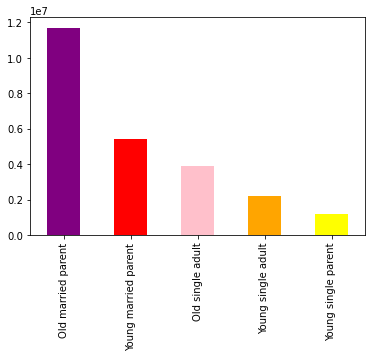

In [27]:
# Create bar chart showing value count of each customer profile
bar1 = ords_prods_cust['Customer Profile'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow'])

In [28]:
# Export histogram
bar1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_customer_profile.png'))

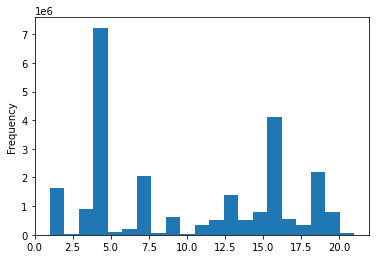

In [33]:
hist1 = ords_prods_cust['department_id'].plot.hist(bins = 21)

In [34]:
# Export histogram
hist1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist1_department_frequency.png'))

# Question 7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
# Apply aggregate function to find max, mean, min of prices per customer profile
ords_prods_cust.groupby('Customer Profile').agg({'prices' : ['mean', 'min', 'max']})

In [ ]:
# Apply aggregate function to find max, mean, min of median days since prior order per customer profile
ords_prods_cust.groupby('Customer Profile').agg({'median_days_since_prior_order' : ['mean', 'min', 'max']})

# Question 8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [ ]:
ords_prods_cust.shape

In [ ]:
ords_prods_cust['spending_flag'].value_counts(dropna = False)

In [ ]:
ords_prods_cust['order_frequency_flag'].value_counts(dropna = False)

In [ ]:
ords_prods_cust['activity flag'].value_counts(dropna = False)

In [ ]:
# Export data to pkl
ords_prods_cust.to_pickle(os.path.join(path, '02_Data','Prepared_Data', 'ords_prods_cust.pkl'))